In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
file_path = 'train_data.xlsx'
# Read the xlsx file into a pandas DataFrame
# Use the file_path variable instead of train_data.xlsx
df = pd.read_excel(file_path)
df

customer_id transaction_date sub_grade        term home_ownership  \
0          10608026       2014-01-01        C5   36 months       MORTGAGE   
1          10235120       2014-01-01        E5   36 months       MORTGAGE   
2          10705805       2014-01-01        D2   36 months       MORTGAGE   
3          11044991       2014-01-01        B4   36 months       MORTGAGE   
4          10161054       2014-01-01        C3   60 months       MORTGAGE   
...             ...              ...       ...         ...            ...   
113700     75790158       2016-03-01        D1   36 months           RENT   
113701     74641781       2016-03-01        D2   36 months            OWN   
113702     73712850       2016-03-01        D1   36 months           RENT   
113703     72713907       2016-03-01        C5   36 months       MORTGAGE   
113704     75820776       2016-03-01        E1   60 months       MORTGAGE   

        cibil_score  total_no_of_acc  annual_inc  int_rate  \
0               665                9     70000.0     16.24   
1               660                8     65000.0     23.40   
2               660                7     73000.0     17.57   
3               690                5    118000.0     12.85   
4               665                5     63000.0     14.98   
...             ...              ...         ...       ...   
113700          670                0     53000.0     16.29   
113701          660                0     40000.0     17.27   
113702          690                0     25000.0     16.29   
113703          680                0     80000.0     15.31   
113704          665                0     48000.0     19.99   

                   purpose  loan_amnt application_type  installment  \
0       debt_consolidation       7200       Individual       253.99   
1         home_improvement       6000       Individual       233.52   
2                    other       8000       Individual       287.50   
3       debt_consolidation      10000       Individual       336.22   
4       debt_consolidation      10000       Individual       237.80   
...                    ...        ...              ...          ...   
113700         credit_card      10000       Individual       353.01   
113701  debt_consolidation       7025       Individual       251.41   
113702         credit_card      10000       Individual       353.01   
113703  debt_consolidation      12625       Individual       439.57   
113704  debt_consolidation      12000       Individual       317.86   

       verification_status  account_bal  emp_length  loan_status  
0                 Verified         4648          11            0  
1          Source Verified        14051          11            1  
2                 Verified        14885          11            0  
3          Source Verified         7542           2            1  
4                 Verified         6318          11            0  
...                    ...          ...         ...          ...  
113700     Source Verified        14609          11            0  
113701     Source Verified        10250           2            1  
113702        Not Verified         6395           3            0  
113703            Verified         3882           7            0  
113704     Source Verified        11096           1            0  

[113705 rows x 17 columns]

In [14]:
# 1. Basic Information
print("Shape of dataset:", df.shape)
print(df.info())
print(df.describe())

Shape of dataset: (113705, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  flo

In [15]:
# 2. Missing Values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
customer_id            0
transaction_date       0
sub_grade              0
term                   0
home_ownership         0
cibil_score            0
total_no_of_acc        0
annual_inc             0
int_rate               0
purpose                0
loan_amnt              0
application_type       0
installment            0
verification_status    0
account_bal            0
emp_length             0
loan_status            0
dtype: int64


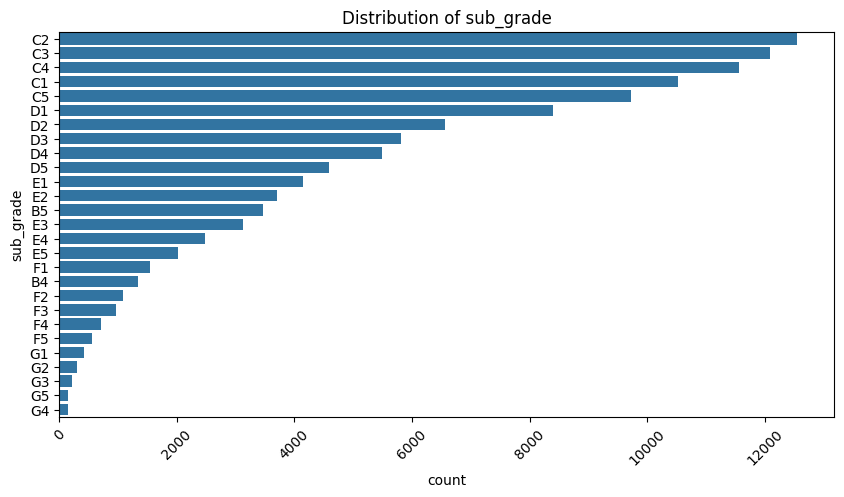

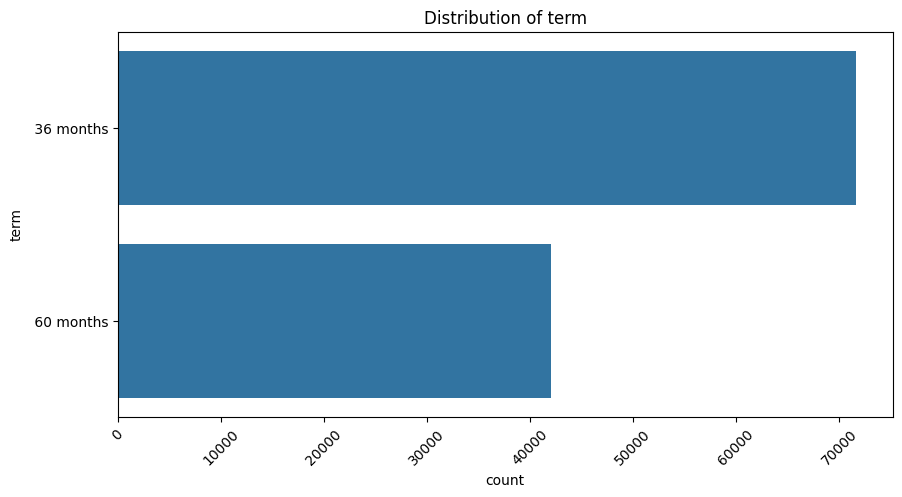

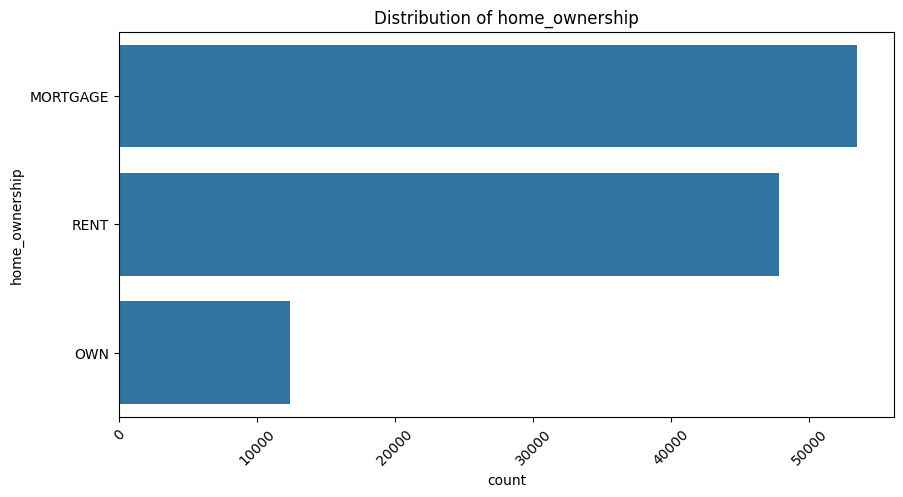

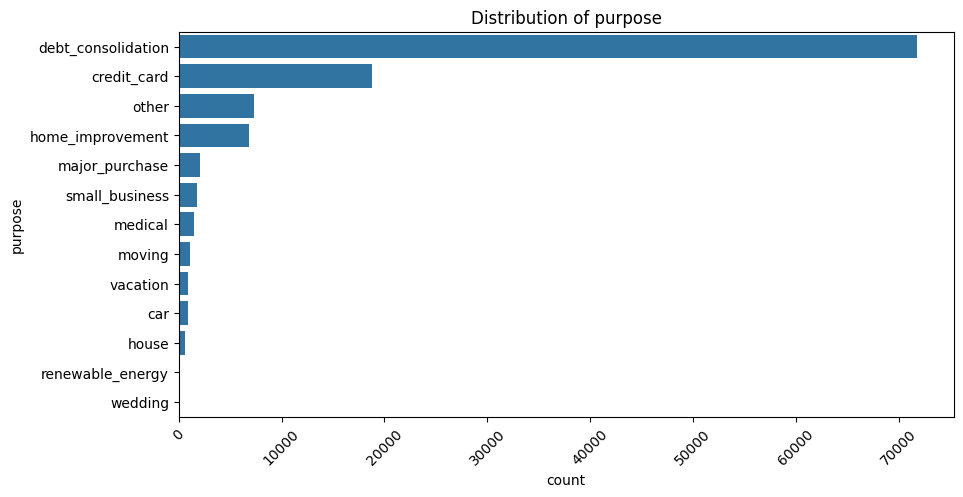

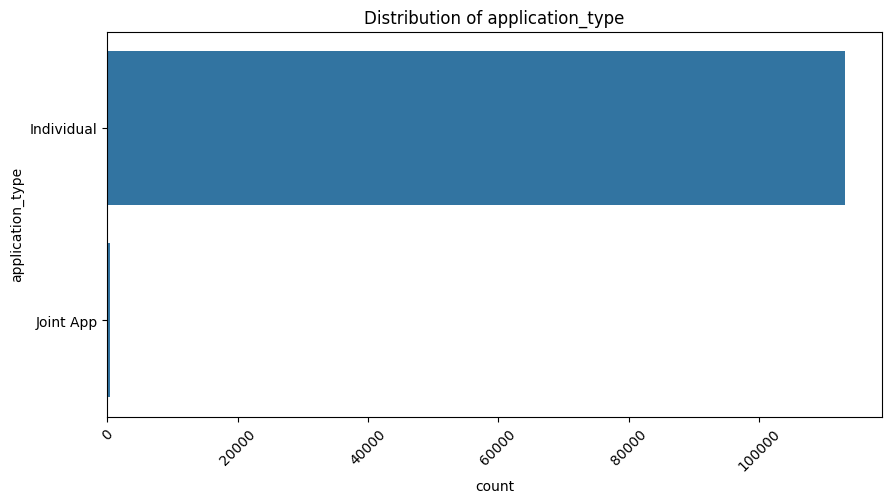

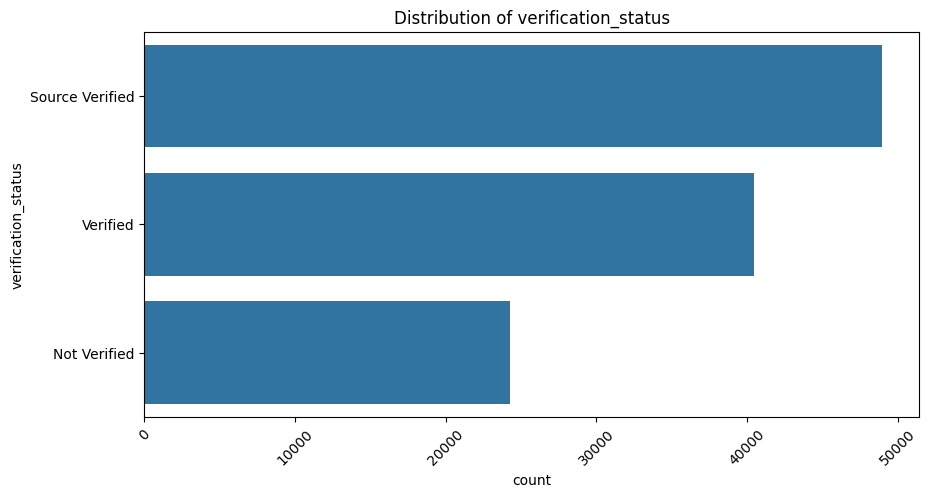

In [16]:
# 3. Data Distribution
# Categorical columns
categorical_columns = ['sub_grade', 'term', 'home_ownership', 'purpose', 'application_type', 'verification_status']
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(df[col], order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()

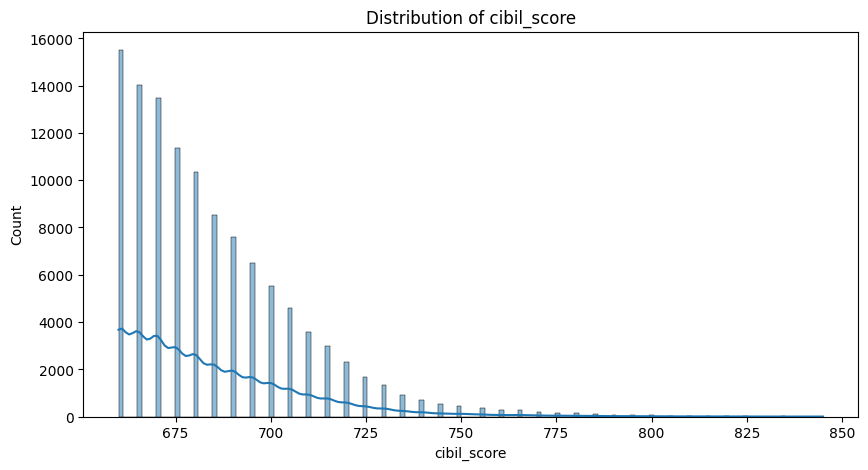

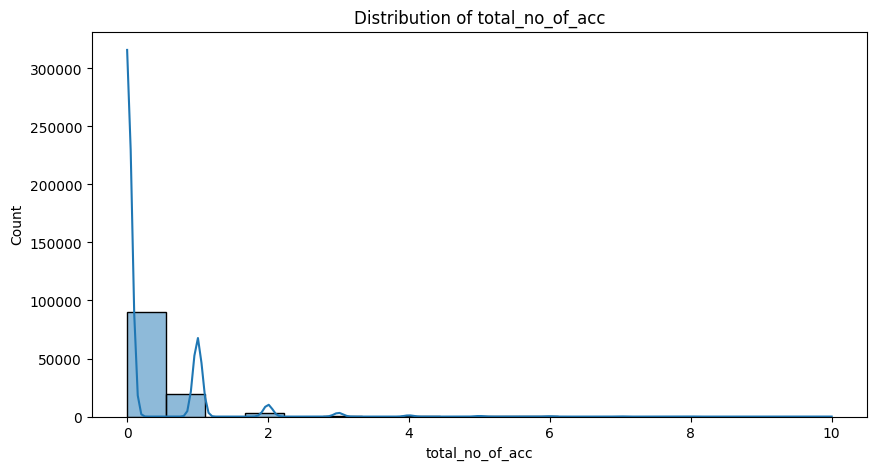

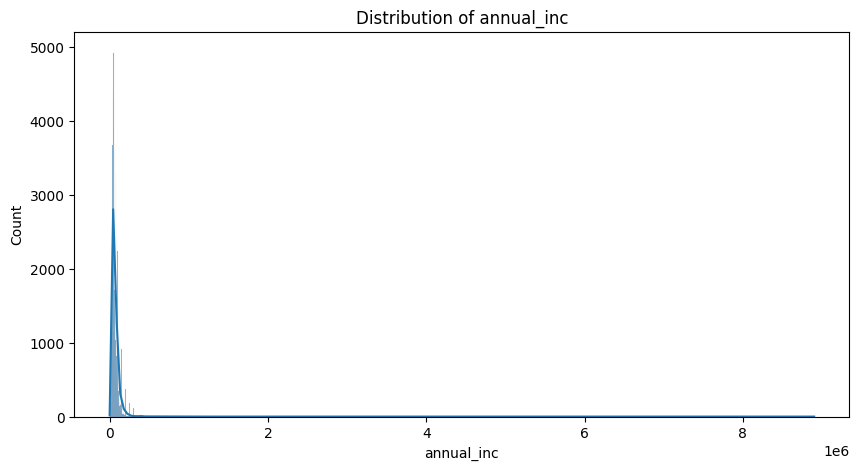

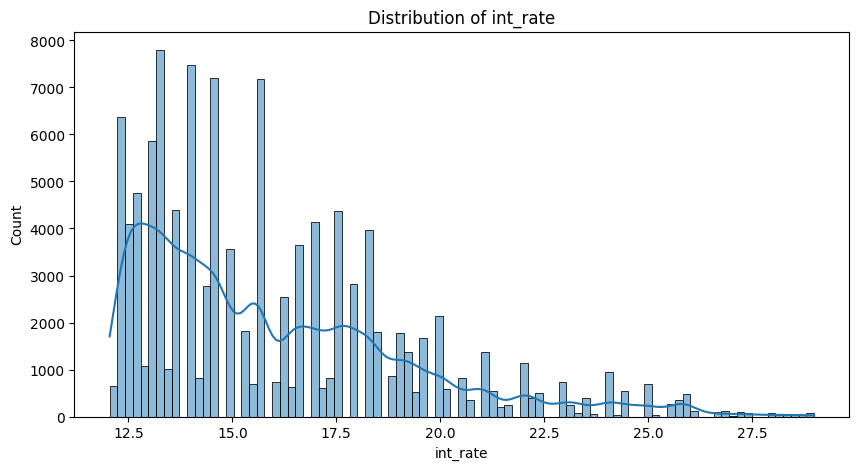

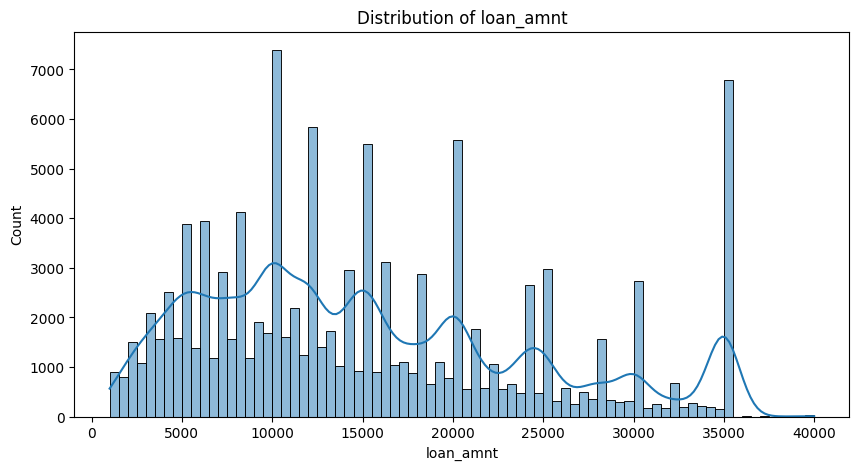

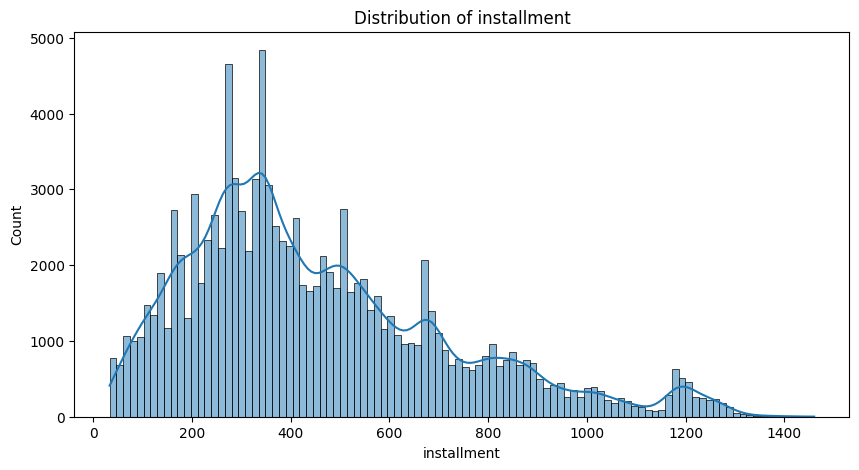

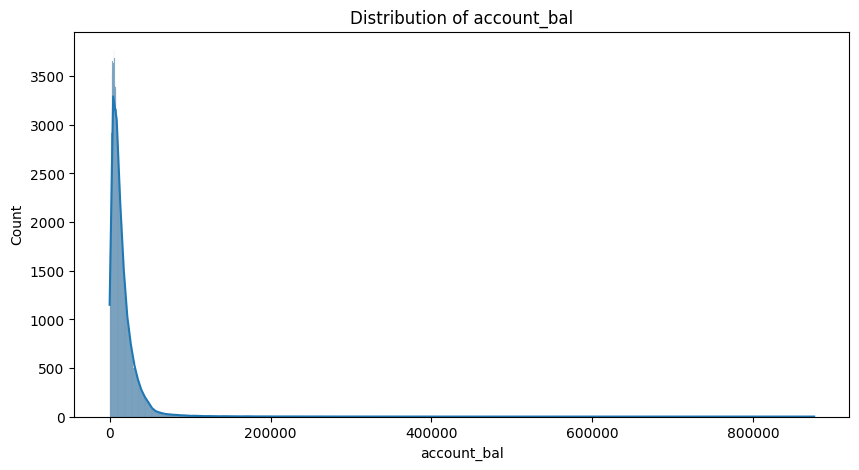

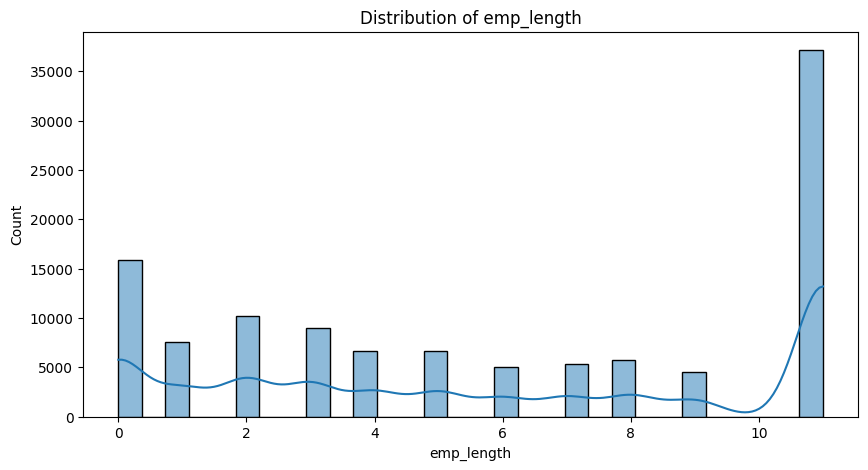

In [17]:
# Numerical columns
numerical_columns = ['cibil_score', 'total_no_of_acc', 'annual_inc', 'int_rate', 'loan_amnt', 'installment', 'account_bal', 'emp_length']
for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

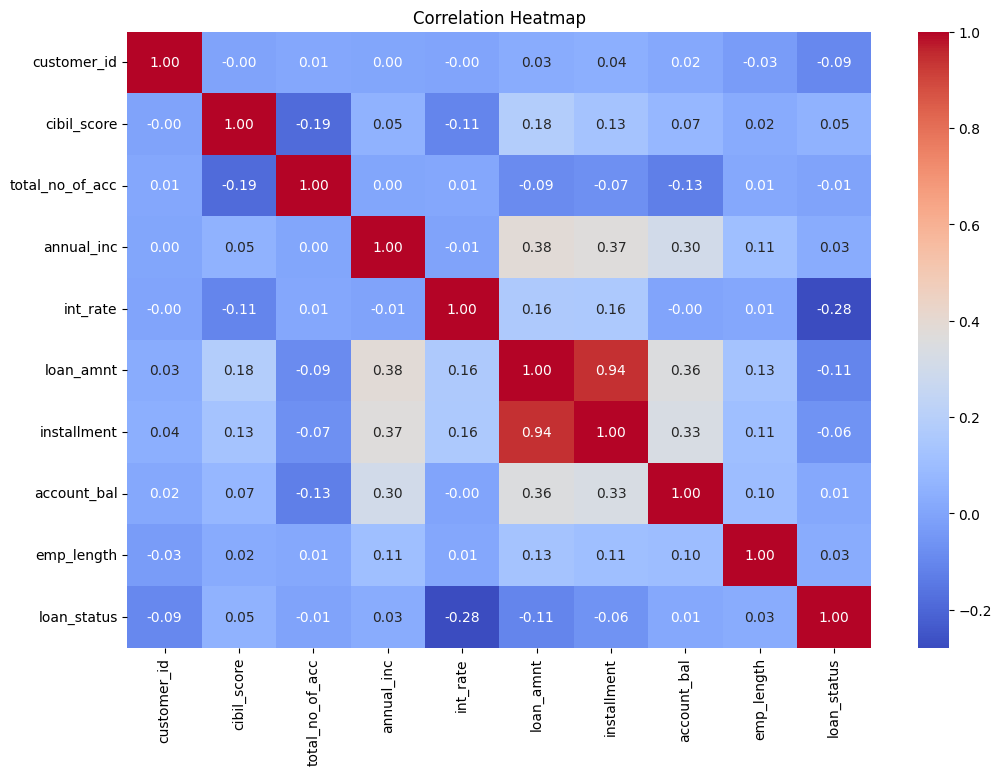

In [20]:
# 4. Correlation Heatmap
plt.figure(figsize=(12, 8))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=np.number)
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

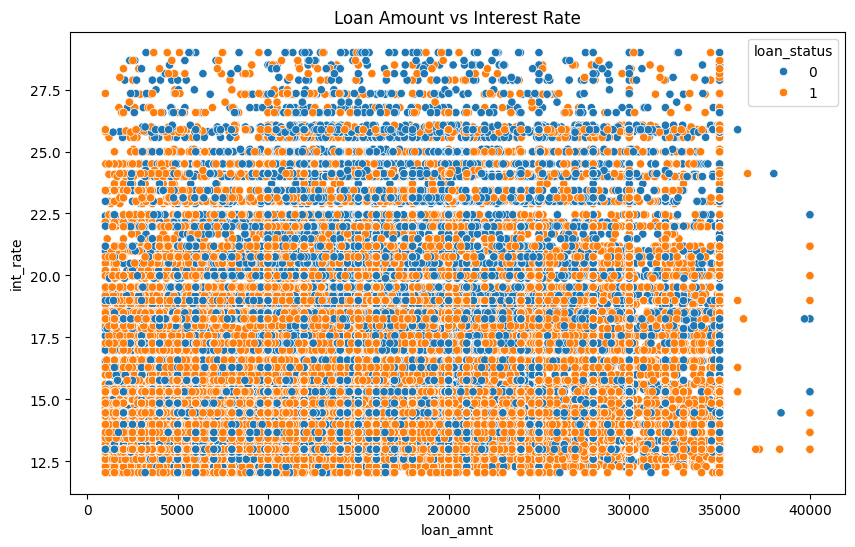

In [24]:
# Convert 'loan_amnt' and 'int_rate' to numeric, errors='coerce' will replace non-numeric values with NaN
df['loan_amnt'] = pd.to_numeric(df['loan_amnt'], errors='coerce')
df['int_rate'] = pd.to_numeric(df['int_rate'], errors='coerce')
# Convert 'loan_status' to string
df['loan_status'] = df['loan_status'].astype(str)

# 5. Relationships
# Loan amount vs Interest rate
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', hue='loan_status', data=df)  # Pass df to 'data'
plt.title("Loan Amount vs Interest Rate")
plt.show()

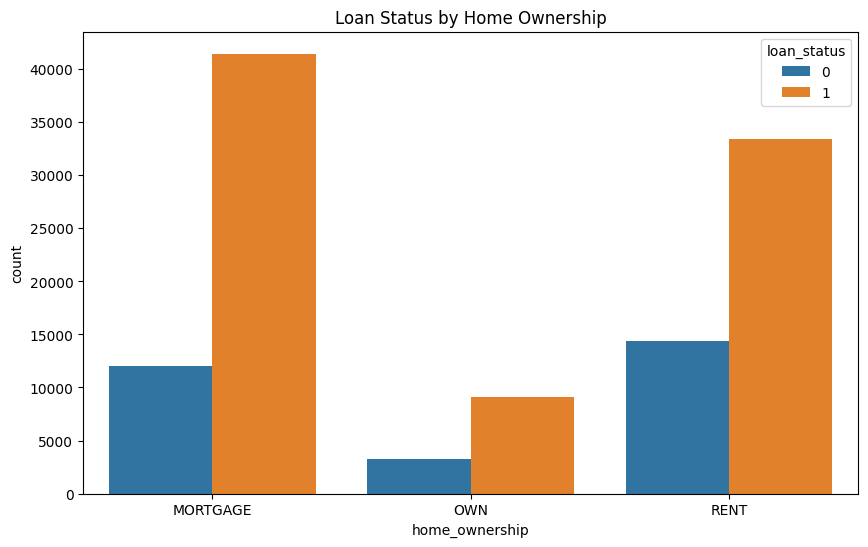

In [26]:
# Loan status by home ownership
plt.figure(figsize=(10, 6))
sns.countplot(x='home_ownership', hue='loan_status', data=df)  # Pass 'df' to the 'data' parameter
plt.title("Loan Status by Home Ownership")
plt.show()

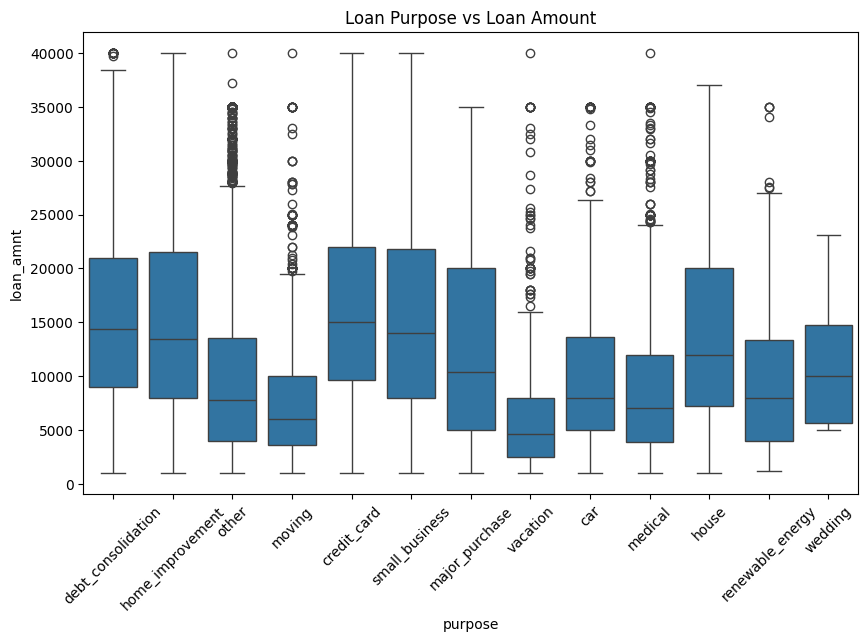

In [27]:
# Loan purpose and loan amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='purpose', y='loan_amnt', data=df)
plt.title("Loan Purpose vs Loan Amount")
plt.xticks(rotation=45)
plt.show()

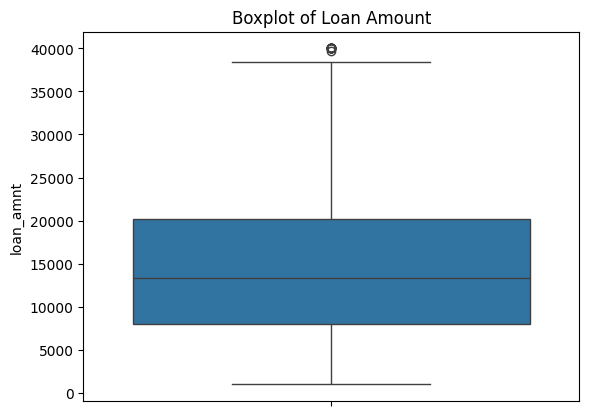

In [29]:
sns.boxplot(df['loan_amnt'])
plt.title("Boxplot of Loan Amount")
plt.show()


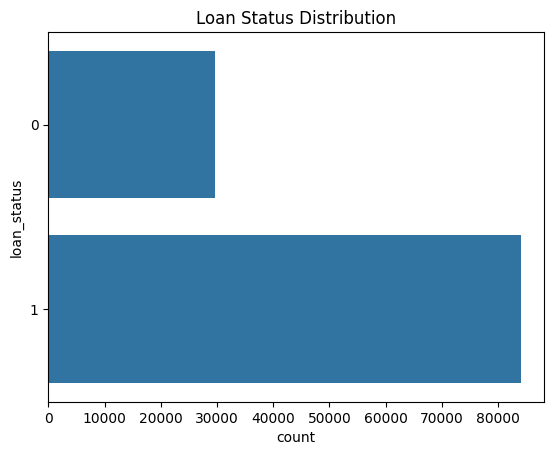

In [30]:
sns.countplot(df['loan_status'])
plt.title("Loan Status Distribution")
plt.show()


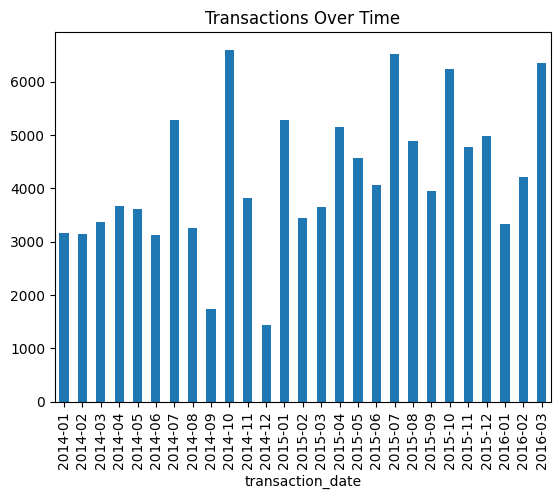

In [31]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df.groupby(df['transaction_date'].dt.to_period('M')).size().plot(kind='bar')
plt.title("Transactions Over Time")
plt.show()


In [32]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['home_ownership'], df['loan_status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: p-value={p}")


Chi-Square Test: p-value=9.302943509438238e-166


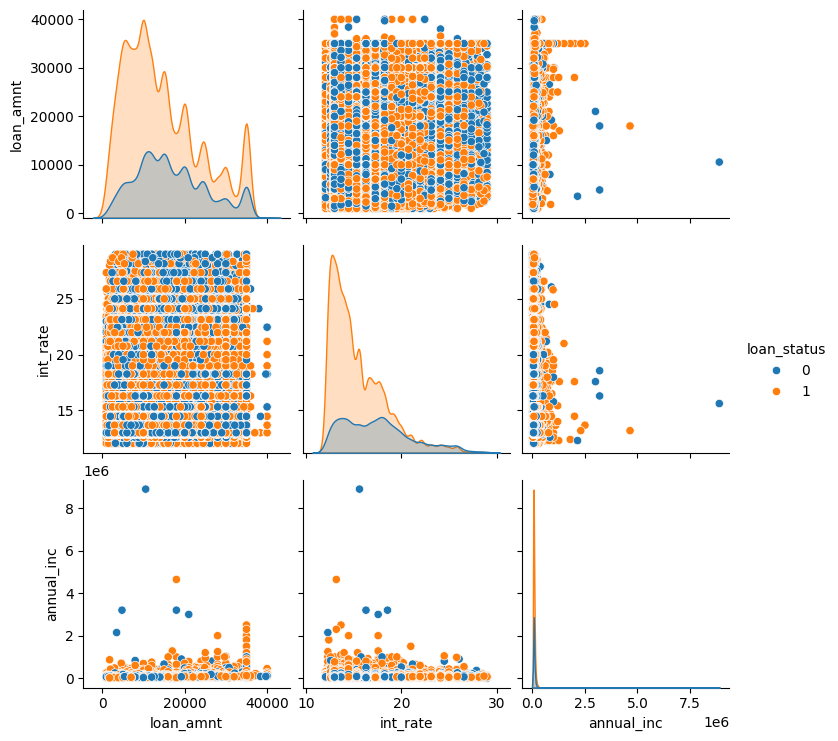

In [34]:
sns.pairplot(df, hue='loan_status', vars=['loan_amnt', 'int_rate', 'annual_inc'])
plt.show()


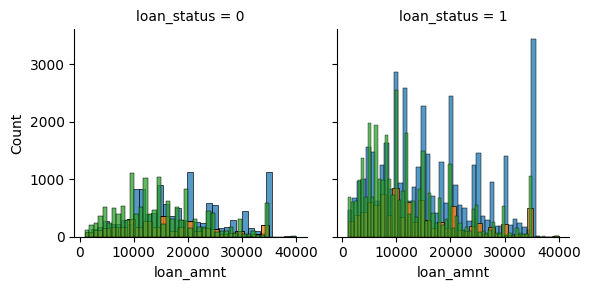

In [35]:
g = sns.FacetGrid(df, col="loan_status", hue="home_ownership")
g.map(sns.histplot, "loan_amnt")


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.select_dtypes(include=['number']).dropna()
vif = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print(vif)


           Feature        VIF
0      customer_id   5.664657
1      cibil_score  31.465137
2  total_no_of_acc   1.203517
3       annual_inc   2.940241
4         int_rate  24.631323
5        loan_amnt  36.439425
6      installment  36.207819
7      account_bal   1.934047
8       emp_length   3.062168


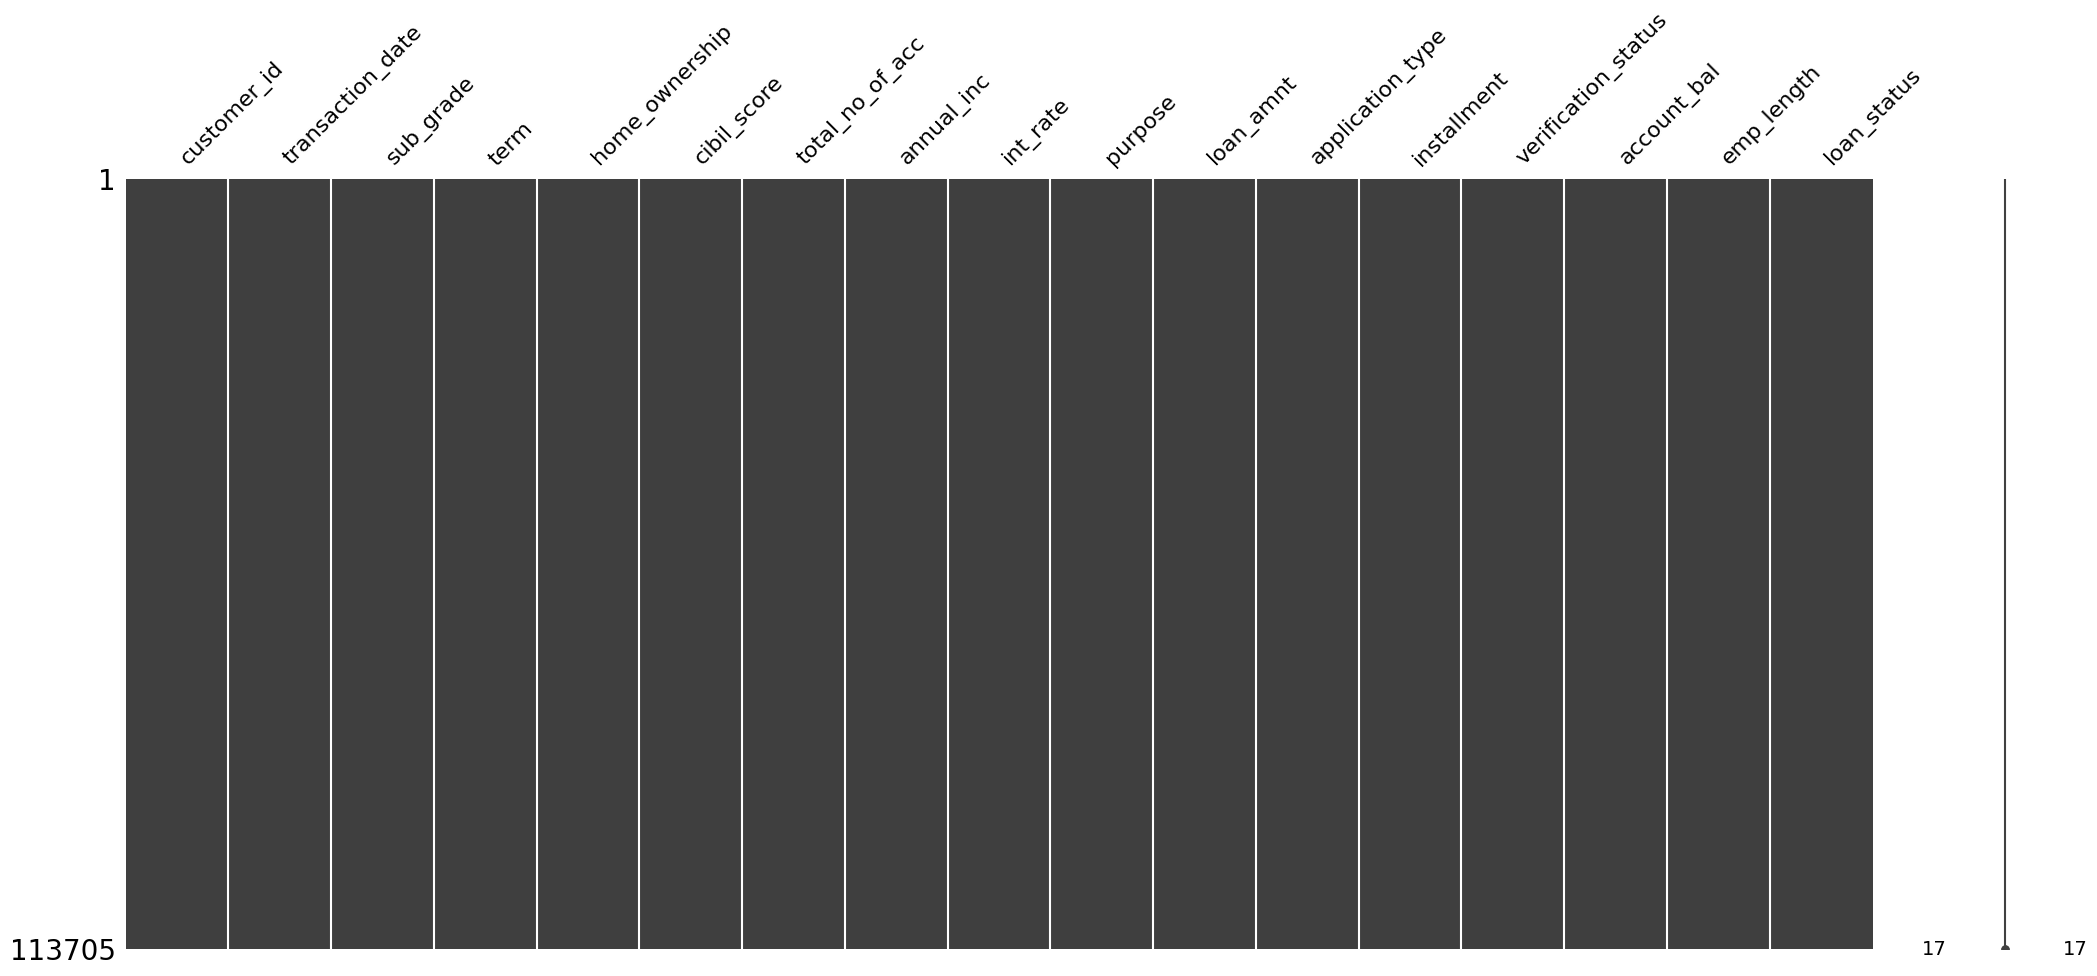

In [38]:
import missingno as msno
msno.matrix(df)
plt.show()
